# Clasificación de semillas de trigo por medio redes neuronales usando Keras

<div style="display: flex; justify-content: space-evenly; align-items: center;">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Vehn%C3%A4pelto_6.jpg/640px-Vehn%C3%A4pelto_6.jpg" />
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Keras_logo.svg/480px-Keras_logo.svg.png" width="300" height="300" />
</div>

Se creará una red neuronal para predecir la especie de una semilla de trigo basándonos en sus características. Usaremos el conjunto de datos de semillas de trigo de Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.

Este conjunto de datos contiene 210 muestras de semillas de trigo de tres especies diferentes: Kama, Rosa y Canadian. 

Cada muestra tiene 7 características que serían las entradas de la red: área, perímetro, compactness, longitud del kernel, ancho del kernel, asimetría del kernel y longitud del grano del kernel. 

La especie de la semilla sería la salida de la red.

In [66]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import requests
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

## Descarga de datos

In [67]:
def download_csv_and_save(url, filename):
    r = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(r.content)

download_csv_and_save("https://cdn.discordapp.com/attachments/982420060457009235/1028508970513604719/seeds_dataset.csv", "seeds_dataset.csv")

## Preparación de datos

### Nombre de las columnas

In [70]:
columns = ["Area", "Perimeter", "Compatibility", "Core length", "Core width", "Asymmetry coefficient", "Grain furrow length", "Label"]

### Lectura de datos

In [71]:
df = pd.read_csv("seeds_dataset.csv", header=None, names=columns)

In [72]:
def normalize_data(data):
    """Normalizes the data between 0 and 1"""
    min_max_scaler = preprocessing.MinMaxScaler()
    data = min_max_scaler.fit_transform(data)
    return pd.DataFrame(data, columns=columns)


In [73]:
def split_features_and_labels(df):
    """Splits the features and labels"""
    features = df.drop("Label", axis=1, inplace=False)
    labels = df["Label"]
    return features, labels

features, labels = split_features_and_labels(df)

In [74]:
labels = to_categorical(labels.values)
labels = pd.DataFrame(labels, columns=["?", "Kama", "Rosa", "Canadian"])
labels = labels.drop("?", axis=1, inplace=False)

In [75]:
train, test, train_labels, test_labels = train_test_split(features, labels,  shuffle=True, train_size=0.7)

In [76]:
test.index = test_labels.index = np.arange(0, len(test))

In [77]:
class_names = ["Kama", "Rosa", "Canadian"]

In [78]:
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=(7,)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [79]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [80]:
history = model.fit(train, train_labels, epochs=50, batch_size=32, validation_data=(test, test_labels))

Epoch 1/50
5/5 [==============================] - 3s 164ms/step - loss: 2.4606 - accuracy: 0.3265 - val_loss: 1.4161 - val_accuracy: 0.3333
Epoch 2/50
5/5 [==============================] - 0s 25ms/step - loss: 1.2893 - accuracy: 0.3333 - val_loss: 1.2642 - val_accuracy: 0.4286
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 1.2868 - accuracy: 0.3878 - val_loss: 1.1667 - val_accuracy: 0.3175
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 1.0404 - accuracy: 0.4422 - val_loss: 0.9848 - val_accuracy: 0.3492
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 0.9815 - accuracy: 0.3265 - val_loss: 0.9466 - val_accuracy: 0.3810
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.9222 - accuracy: 0.6259 - val_loss: 0.9010 - val_accuracy: 0.6032
Epoch 7/50
5/5 [==============================] - 0s 23ms/step - loss: 0.8912 - accuracy: 0.6327 - val_loss: 0.8683 - val_accuracy: 0.7937
Epoch 8/50
5/5 [==========

In [81]:
test_loss, test_acc = model.evaluate(test, test_labels)

2/2 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.9048


In [82]:
predictions = model.predict(test)

2/2 [==============================] - 0s 5ms/step


In [83]:
test_labels.loc[1]
class_names[np.argmax(predictions[1])]

'Canadian'

In [84]:
print(len(list(filter(lambda x: np.argmax(x) == 0, predictions))))
print(len(list(filter(lambda x: np.argmax(x) == 1, predictions))))
print(len(list(filter(lambda x: np.argmax(x) == 2, predictions))))

19
25
19


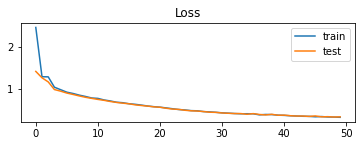

In [85]:
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

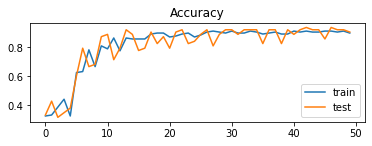

In [86]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()